In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 60.1 MB/s eta 0:00:00
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [ ]:

import tensorflow as tf
print("tensorflow version :{}".format(tf.__version__))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

tensorflow version :2.9.2
Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4873305750200780401
 xla_global_id: -1, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14417788928
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7930380732193493232
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
 xla_global_id: 416903419]

In [ ]:
#### physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import class_weight

In [ ]:

from keras.layers import Conv1D, Dense, Dropout, GlobalMaxPool1D, MaxPool1D
from keras.layers import TimeDistributed, LSTM, Bidirectional, Input, concatenate,RepeatVector
from keras import regularizers
# from keras.layers.normalization import BatchNormalization
from keras.models import Sequential, load_model, Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from tensorflow.keras.utils import plot_model, to_categorical
from keras.losses import binary_crossentropy
from keras.optimizers import Adam
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from keras.regularizers import l1,l2


In [ ]:
data_path = '/content/drive/MyDrive/CAV/data/Instant attack/10000/'

In [ ]:
sensor1_data = pd.read_csv(data_path + "Sensor1_values_instant_10000.csv", index_col= 'Unnamed: 0')
sensor1_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
len(sensor1_data)

29800

In [ ]:
sensor1_label = pd.read_csv(data_path+"Ground_truth_instant_10000_sensor1.csv", names=['Class'])
sensor1_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
len(sensor1_label)

29800

In [ ]:
sensor2_data = pd.read_csv(data_path + "Sensor2_values_instant_10000.csv", index_col = "Unnamed: 0")
sensor2_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor2_label = pd.read_csv(data_path + "Ground_truth_instant_10000_sensor2.csv",names=['Class'])
sensor2_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
sensor3_data = pd.read_csv(data_path + "Sensor3_values_instant_10000.csv", index_col = "Unnamed: 0")
sensor3_data.head()

,InVehicle_Longitudinal_Speed,GPS_Speed,InVehicle_Longitudinal_Accel
0,11.375000,11.307097,-0.103000
1,11.366708,11.255964,-0.353946
2,11.362331,11.249115,-0.090962
3,11.358665,11.263280,-0.043470
4,11.356745,11.270361,-0.037579


In [ ]:
sensor3_label = pd.read_csv(data_path + "Ground_truth_instant_10000_sensor3.csv", names=['Class'])
sensor3_label.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
scaler = StandardScaler()
scaler.fit(sensor1_data)
sensor1_data_normal = scaler.transform(sensor1_data) 
sensor1_data_normal[:5]

array([[-0.21054207, -0.231351  , -0.00567869],
       [-0.21108653, -0.23479164, -0.02567354],
       [-0.21137395, -0.23525246, -0.00471953],
       [-0.21161469, -0.23429934, -0.00093548],
       [-0.21174074, -0.23382286, -0.00046607]])

In [ ]:
scaler = StandardScaler()
scaler.fit(sensor2_data)
sensor2_data_normal = scaler.transform(sensor2_data) 
sensor2_data_normal[:5]

array([[-0.21369726, -0.23191766, -0.01656186],
       [-0.21424364, -0.2353596 , -0.03764356],
       [-0.21453208, -0.23582059, -0.01555056],
       [-0.21477368, -0.23486712, -0.01156082],
       [-0.21490017, -0.23439046, -0.0110659 ]])

In [ ]:
scaler = StandardScaler()
scaler.fit(sensor3_data)
sensor3_data_normal = scaler.transform(sensor3_data) #
sensor3_data_normal[:5]

array([[-0.21369726, -0.23191766, -0.01656186],
       [-0.21424364, -0.2353596 , -0.03764356],
       [-0.21453208, -0.23582059, -0.01555056],
       [-0.21477368, -0.23486712, -0.01156082],
       [-0.21490017, -0.23439046, -0.0110659 ]])

In [ ]:
window_size = 10

# create windows with overlap
def convertToFrames(X_data,y_data, step):
    X, Y =[], []    
    for i in range(len(X_data)-step):
        y_or = 0
        d=i+step  
        X.append(X_data[i:d,])
        for y in y_data.iloc[i:d].values:
           y_or = y_or or y
        
        Y.append(y_or)
    return np.array(X), np.array(Y)

In [ ]:
X_sensor1, y_sensor1 = convertToFrames(sensor1_data_normal, sensor1_label, window_size)
X_sensor1.shape, y_sensor1.shape
# print(X_sensor1[0])
# print(X_sensor1[1])

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor2, y_sensor2 = convertToFrames(sensor2_data_normal, sensor2_label, window_size)
X_sensor2.shape, y_sensor2.shape

((29790, 10, 3), (29790, 1))

In [ ]:
X_sensor3, y_sensor3 = convertToFrames(sensor3_data_normal, sensor3_label, window_size)
X_sensor3.shape, y_sensor3.shape

((29790, 10, 3), (29790, 1))

In [ ]:
y_sensor1 = to_categorical(y_sensor1, num_classes= 2, dtype='float32')
X_train_sensor1,X_test_sensor1, y_train_sensor1, y_test_sensor1 = train_test_split(X_sensor1,y_sensor1,random_state = 1400, test_size= 0.15)
y_train_sensor1, y_test_sensor1 = y_train_sensor1.squeeze(), y_test_sensor1.squeeze()
X_train_sensor1.shape, X_test_sensor1.shape,y_train_sensor1.shape, y_test_sensor1.shape

((25321, 10, 3), (4469, 10, 3), (25321, 2), (4469, 2))

In [ ]:
y_sensor2 = to_categorical(y_sensor2, num_classes= 2, dtype='float32')
X_train_sensor2,X_test_sensor2, y_train_sensor2, y_test_sensor2 = train_test_split(X_sensor2,y_sensor2,random_state = 1400, test_size= 0.15)
y_train_sensor2, y_test_sensor2 = y_train_sensor2.squeeze(), y_test_sensor2.squeeze()
X_train_sensor2.shape, X_test_sensor2.shape,y_train_sensor2.shape, y_test_sensor2.shape

((25321, 10, 3), (4469, 10, 3), (25321, 2), (4469, 2))

In [ ]:
y_sensor3 = to_categorical(y_sensor3, num_classes= 2, dtype='float32')
X_train_sensor3,X_test_sensor3, y_train_sensor3, y_test_sensor3 = train_test_split(X_sensor3,y_sensor3,random_state = 1400, test_size= 0.15)
y_train_sensor3, y_test_sensor3 = y_train_sensor3.squeeze(), y_test_sensor3.squeeze()
X_train_sensor3.shape, X_test_sensor3.shape,y_train_sensor3.shape, y_test_sensor3.shape

((25321, 10, 3), (4469, 10, 3), (25321, 2), (4469, 2))

In [ ]:

def creatModel():
  
    model = Sequential()
    model.add(Conv1D(kernel_size=3, filters= 40, activation= 'relu', padding='same'))
    model.add(Dropout(0.1))
    model.add( Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(Conv1D(kernel_size=3, filters= 60, activation= 'relu', padding='same'))
    model.add(Dropout(0.1))
    model.add(GlobalMaxPool1D())
    model.add(RepeatVector(X_train_sensor1.shape[1]))
    model.add(LSTM(256, return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(128, return_sequences=True))
    model.add(Dropout(rate=0.2))
    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(rate=0.2))
    model.add((Dense(32)))
    model.add((Dense(16)))
    model.add(Dense(2, activation='sigmoid', kernel_regularizer=l2()))
    model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

    return model


In [ ]:
import time

class TimeHistory(Callback):
  
    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        epoch_time = time.time() - self.epoch_time_start
        logs['epoch_time'] = epoch_time


In [ ]:
model_path = '/content/drive/MyDrive/CAV/data/Instant attack/10000/Models/Models14-6/'

class Model_save(Callback):
  def on_epoch_end(self, epoch, logs={}):
    self.model.save(model_path + "CNN-LSTM-autoEncoder-Instant-10000-CAV-perEpoch_{}.h5".format(sensor))
    

In [ ]:
def setCallbacks(sensor):

  best_model_path = model_path + 'Best_CNN-LSTM-autoEncoder-Instant-10000-CAV_{}.h5'.format(sensor)
  checkpoint = ModelCheckpoint(best_model_path, monitor='val_loss', save_best_only=True, mode='min')

  history_cb = tf.keras.callbacks.CSVLogger(model_path + 'historyLOG_Instant-10000_{}.csv'.format(sensor), separator=",", append=True)

  model_save = Model_save()

  Estop = EarlyStopping(monitor='val_accuracy', patience= 300)
  
  return model_save, checkpoint, history_cb, Estop

In [ ]:
sensor = "sensor1"
time_callback = TimeHistory()
model_sensor1 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor1")
history_sensor1 = model_sensor1.fit(X_train_sensor1, y_train_sensor1,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#


Epoch 1/500
179/179 [==============================] - 23s 41ms/step - loss: 0.1413 - accuracy: 0.9641 - val_loss: 0.0434 - val_accuracy: 0.9945 - epoch_time: 22.4298
Epoch 2/500
179/179 [==============================] - 5s 27ms/step - loss: 0.0456 - accuracy: 0.9926 - val_loss: 0.0344 - val_accuracy: 0.9953 - epoch_time: 4.5282
Epoch 3/500
179/179 [==============================] - 4s 21ms/step - loss: 0.0294 - accuracy: 0.9953 - val_loss: 0.0209 - val_accuracy: 0.9961 - epoch_time: 3.5165
Epoch 4/500
179/179 [==============================] - 2s 14ms/step - loss: 0.0228 - accuracy: 0.9964 - val_loss: 0.0171 - val_accuracy: 0.9976 - epoch_time: 2.2589
Epoch 5/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0198 - accuracy: 0.9967 - val_loss: 0.0163 - val_accuracy: 0.9976 - epoch_time: 2.2308
Epoch 6/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0209 - accuracy: 0.9961 - val_loss: 0.0187 - val_accuracy: 0.9976 - epoch_time: 2.3030
Epoch 7/

In [ ]:
print(model_sensor1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 40)            400       
                                                                 
 dropout (Dropout)           (None, 10, 40)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 60)            7260      
                                                                 
 dropout_1 (Dropout)         (None, 10, 60)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 60)            10860     
                                                                 
 dropout_2 (Dropout)         (None, 10, 60)            0         
                                                                 
 global_max_pooling1d (Globa  (None, 60)               0

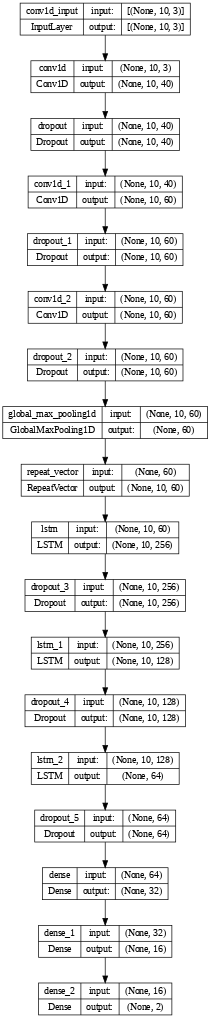

In [ ]:
plot_model(model= model_sensor1, show_shapes= True, dpi=50)

In [ ]:
sensor = "sensor2"
time_callback = TimeHistory()
model_sensor2 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor2")
history_sensor2 = model_sensor2.fit(X_train_sensor2, y_train_sensor2,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#

Epoch 1/500
179/179 [==============================] - 8s 19ms/step - loss: 0.1644 - accuracy: 0.9560 - val_loss: 0.0585 - val_accuracy: 0.9925 - epoch_time: 8.1564
Epoch 2/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0475 - accuracy: 0.9934 - val_loss: 0.0448 - val_accuracy: 0.9933 - epoch_time: 2.1806
Epoch 3/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0306 - accuracy: 0.9954 - val_loss: 0.0269 - val_accuracy: 0.9957 - epoch_time: 2.2133
Epoch 4/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0211 - accuracy: 0.9970 - val_loss: 0.0238 - val_accuracy: 0.9964 - epoch_time: 2.2032
Epoch 5/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0171 - accuracy: 0.9975 - val_loss: 0.0190 - val_accuracy: 0.9964 - epoch_time: 2.1753
Epoch 6/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0156 - accuracy: 0.9973 - val_loss: 0.0211 - val_accuracy: 0.9961 - epoch_time: 2.1419
Epoch 7/50

In [ ]:
sensor = "sensor3"
time_callback = TimeHistory()
model_sensor3 = creatModel()
model_save, checkpoint, history_cb, Estop = setCallbacks("sensor3")
history_sensor3 = model_sensor3.fit(X_train_sensor3, y_train_sensor3,
                                    batch_size = 128, epochs = 500,
                                    validation_split = 0.1,
                                    verbose = 1,
                                    callbacks = [time_callback, model_save, checkpoint, history_cb, Estop])
                                    # class_weight= class_weights)#

Epoch 1/500
179/179 [==============================] - 9s 19ms/step - loss: 0.1513 - accuracy: 0.9580 - val_loss: 0.0369 - val_accuracy: 0.9949 - epoch_time: 8.3266
Epoch 2/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0333 - accuracy: 0.9962 - val_loss: 0.0218 - val_accuracy: 0.9984 - epoch_time: 2.2414
Epoch 3/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0181 - accuracy: 0.9981 - val_loss: 0.0092 - val_accuracy: 0.9992 - epoch_time: 2.1681
Epoch 4/500
179/179 [==============================] - 2s 14ms/step - loss: 0.0122 - accuracy: 0.9984 - val_loss: 0.0066 - val_accuracy: 0.9996 - epoch_time: 2.2241
Epoch 5/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0088 - accuracy: 0.9989 - val_loss: 0.0058 - val_accuracy: 0.9992 - epoch_time: 2.2137
Epoch 6/500
179/179 [==============================] - 2s 13ms/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 0.0036 - val_accuracy: 0.9996 - epoch_time: 2.2136
Epoch 7/50

In [ ]:
#plot history of model_sensor1
history_sensor1 = pd.read_csv(model_path +"historyLOG_Instant-10000_sensor1.csv", index_col='epoch')
history_sensor1.reset_index(drop= True, inplace= True)
history_sensor1.head()
print('Average Exe_time for sensor1: {} sec.'.format(round(np.mean(history_sensor1['epoch_time'].values),3)))


Average Exe_time for sensor1: 2.4 sec.


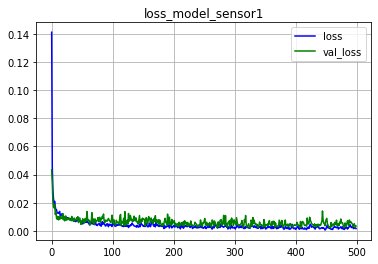

In [ ]:
plt.plot( history_sensor1['loss'], 'b',label = 'loss')
plt.plot( history_sensor1['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor1')
plt.show()

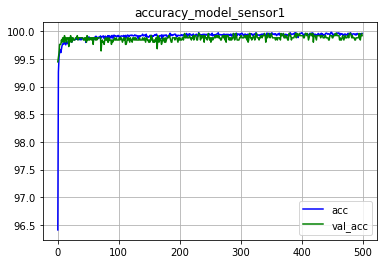

In [ ]:
plt.plot(history_sensor1['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor1['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor1')
plt.show()

In [ ]:
history_sensor2 = pd.read_csv(model_path +"historyLOG_Instant-10000_sensor2.csv", index_col='epoch')
history_sensor2.reset_index(drop= True, inplace= True)
history_sensor2.head()
print('Average Exe_time for sensor2: {} sec.'.format(round(np.mean(history_sensor2['epoch_time'].values),3)))


Average Exe_time for sensor2: 2.354 sec.


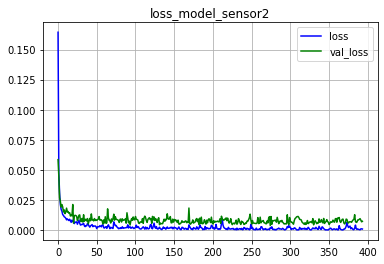

In [ ]:
plt.plot( history_sensor2['loss'], 'b',label = 'loss')
plt.plot( history_sensor2['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor2')
plt.show()

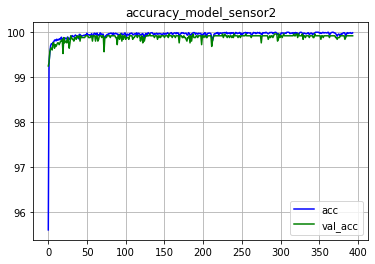

In [ ]:
plt.plot(history_sensor2['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor2['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor2')
plt.show()

In [ ]:
history_sensor3 = pd.read_csv(model_path +"historyLOG_Instant-10000_sensor3.csv", index_col='epoch')
history_sensor3.reset_index(drop= True, inplace= True)
history_sensor3.head()
print('Average Exe_time for sensor3: {} sec.'.format(round(np.mean(history_sensor3['epoch_time'].values),3)))


Average Exe_time for sensor3: 2.307 sec.


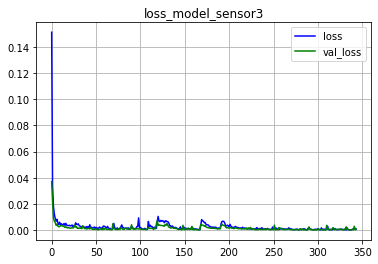

In [ ]:
plt.plot( history_sensor3['loss'], 'b',label = 'loss')
plt.plot( history_sensor3['val_loss'], 'g', label = 'val_loss')
plt.legend()
plt.grid()
plt.title('loss_model_sensor3')
plt.show()

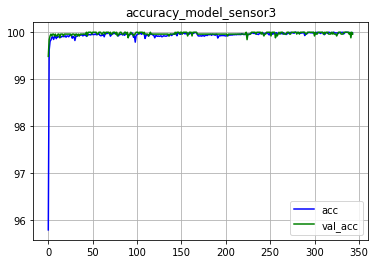

In [ ]:
plt.plot(history_sensor3['accuracy']* 100,'b',label = 'acc')
plt.plot(history_sensor3['val_accuracy'] * 100,'g', label = 'val_acc')
plt.legend()
plt.grid()
plt.title('accuracy_model_sensor3')
plt.show()

In [ ]:
#last model_sensor1 evaluation
test_loss, test_acc = model_sensor1.evaluate( X_test_sensor1, y_test_sensor1, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

140/140 [==============================] - 1s 6ms/step - loss: 0.0056 - accuracy: 0.9987
test accuracy :99.9% 
 test loss :0.00557


In [ ]:
#last model_sensor2 evaluation
test_loss, test_acc = model_sensor2.evaluate( X_test_sensor2, y_test_sensor2, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

140/140 [==============================] - 1s 5ms/step - loss: 0.0044 - accuracy: 0.9991
test accuracy :99.9% 
 test loss :0.00442


In [ ]:
#last model_sensor3 evaluation
test_loss, test_acc = model_sensor3.evaluate( X_test_sensor3, y_test_sensor3, verbose= 1)
print('test accuracy :{:.1%} \n test loss :{:.3}'.format(test_acc, test_loss))

140/140 [==============================] - 1s 5ms/step - loss: 2.7797e-04 - accuracy: 1.0000
test accuracy :100.0% 
 test loss :0.000278


In [ ]:
y_pred_sensor1 = model_sensor1.predict( X_test_sensor1, verbose= 1)
y_pred_sensor2 = model_sensor2.predict( X_test_sensor2, verbose= 1)
y_pred_sensor3 = model_sensor3.predict( X_test_sensor3, verbose= 1)

140/140 [==============================] - 2s 4ms/step


In [ ]:
y_pred_sensor1 = [np.argmax(i) for i in y_pred_sensor1]
y_pred_sensor2 = [np.argmax(i) for i in y_pred_sensor2]
y_pred_sensor3 = [np.argmax(i) for i in y_pred_sensor3]

In [ ]:
y_pred_total = []
for i in range(len(y_pred_sensor1)):
  y_pred_total.append( y_pred_sensor1[i] or y_pred_sensor2[i] or y_pred_sensor3[i])

In [ ]:
assert(len(y_pred_total) == len(y_pred_sensor1))

In [ ]:
y_test_sensor1 = [np.argmax(i) for i in y_test_sensor1]
y_test_sensor2 = [np.argmax(i) for i in y_test_sensor2]
y_test_sensor3 = [np.argmax(i) for i in y_test_sensor3]

In [ ]:
y_test_total = []
for i in range(len(y_test_sensor1)):
  y_test_total.append(y_test_sensor1[i] or y_test_sensor2[i] or y_test_sensor3[i])

In [ ]:
print("Sensor 1 performanace:")
recall = recall_score(y_test_sensor1, y_pred_sensor1, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor1, y_pred_sensor1, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor1, y_pred_sensor1, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor1, y_pred_sensor1)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 1 performanace:
recall score : 99.87%

precision score: 99.87%

F1 score: 99.87%

accuracy score: 99.87%



In [ ]:
print("Sensor 2 performanace:")
recall = recall_score(y_test_sensor2, y_pred_sensor2, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor2, y_pred_sensor2, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor2, y_pred_sensor2, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor2, y_pred_sensor2)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 2 performanace:
recall score : 99.91%

precision score: 99.91%

F1 score: 99.91%

accuracy score: 99.91%



In [ ]:
print("Sensor 3 performanace:")
recall = recall_score(y_test_sensor3, y_pred_sensor3, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_sensor3, y_pred_sensor3, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_sensor3, y_pred_sensor3, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_sensor3, y_pred_sensor3)
print("accuracy score: {:.2%}\n".format(accuracy))

Sensor 3 performanace:
recall score : 100.00%

precision score: 100.00%

F1 score: 100.00%

accuracy score: 100.00%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='micro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='micro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='micro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 99.91%

precision score: 99.91%

F1 score: 99.91%

accuracy score: 99.91%



In [ ]:
print("All Sensors performanace:\n")

recall = recall_score(y_test_total, y_pred_total, average='macro')
print('recall score : {:.2%}\n'.format(recall ))

precision = precision_score(y_test_total, y_pred_total, average='macro')
print('precision score: {:.2%}\n'.format(precision ))

f1 = f1_score(y_test_total, y_pred_total, average='macro')
print("F1 score: {:.2%}\n".format(f1 ))

accuracy = accuracy_score(y_test_total, y_pred_total)
print("accuracy score: {:.2%}\n".format(accuracy))

All Sensors performanace:

recall score : 99.90%

precision score: 99.92%

F1 score: 99.91%

accuracy score: 99.91%



In [ ]:
conf = confusion_matrix(y_test_total, y_pred_total, labels=[1,0])
conf_df = pd.DataFrame(conf, columns= [1,0], index= [1,0])
conf_df

,1,0
1,1824,3
0,1,2641
